<h1 align=center style="line-height:300%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
سری سوم تمارین عملی درس داده کاوی
</font>
</h1>
<h3 align=center style="line-height:100%;font-family:vazir;color:#0099cc">
استاد درس: دکتر مریم امیر مزلقانی
</h3>
<h5 align=center style="font-size: 20px;line-height:100%;font-family:vazir;color:#0099cc">
طراح تمرین عملی: پوریا جمیع  
</h5>
<p align=center style="font-size: 16;line-height:100%;font-family:vazir;color:#0099cc">
    <a href="mailto:Aut.DataMining.Fall@gmail.com">Aut.DataMining.Fall@gmail.com</a>
</p>


<div dir="rtl">
<p align=right style="font-size: 16;line-height:100%;font-family:vazir;color:yellow">
لطفا خواسته های تمرین را در بخش خودش انجام دهید.
</p>
<div dir="rtl">
<p align=right style="font-size: 16;line-height:100%;font-family:vazir;color:yellow">
میتوانید در صورت نیاز بلوک جدیدی برای هر بخش اضافه کنید تا کد خوانا تر شود.
</p>
</div>

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
خواندن کتابخانه ها
</h3>
</div>

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, precision_score, accuracy_score, classification_report
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
import time
import seaborn as sns


---


<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
دریافت مجموعه داده
</h3>
</div>

In [8]:
# load data
df = pd.read_csv("Adult_TrainDataset.csv").dropna()
print(df.shape)
df.head(10)

(32561, 15)


,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K



---


<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
پیش پردازش داده
</h3>
</div>
<div dir="rtl">
<p align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
در این بخش با روش های مختلف داده هارا پردازش کرده و تغییرات لازم را روی داده لحاظ کرده تا دقت نهایی افزایش یابد.
</p>
</div>

In [9]:
# Data Preprocessing
for col in df.columns:
    df = df.drop(df[df[col] == " ?"].index)

df = df.reset_index(drop=True)
df

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30158,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30159,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30160,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [10]:
encoder = LabelEncoder()
categorial_columns = list(df.select_dtypes(include='object').columns)

# For Descision Tree Part To Work I had To Encode The Population Level Too
for col in categorial_columns:
    df.loc[:, (col)] = encoder.fit_transform(df[col])
df

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
30158,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
30159,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
30160,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [11]:
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df.loc[:, df.columns != 'Income']), columns=df.columns[:-1])
df_normalized

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country
0,0.042796,2.936000,-1.062722,-0.349865,1.128918,0.947847,-1.479055,-0.261249,0.385048,0.692806,0.146092,-0.218586,-0.077734,0.264924
1,0.880288,1.887682,-1.007871,-0.349865,1.128918,-0.387275,-0.734545,-0.885737,0.385048,0.692806,-0.147445,-0.218586,-2.331531,0.264924
2,-0.033340,-0.208955,0.244693,0.174763,-0.439738,-1.722396,-0.238206,-0.261249,0.385048,0.692806,-0.147445,-0.218586,-0.077734,0.264924
3,1.108695,-0.208955,0.425240,-2.448375,-1.224066,-0.387275,-0.238206,-0.885737,-2.011035,0.692806,-0.147445,-0.218586,-0.077734,0.264924
4,-0.794697,-0.208955,1.406658,-0.349865,1.128918,-0.387275,0.754473,2.236703,-2.011035,-1.443405,-0.147445,-0.218586,-0.077734,-5.304034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,-0.870832,-0.208955,0.638972,-0.874492,0.736754,-0.387275,1.498983,2.236703,0.385048,-1.443405,-0.147445,-0.218586,-0.244682,0.264924
30158,0.118931,-0.208955,-0.335252,0.174763,-0.439738,-0.387275,0.009964,-0.885737,0.385048,0.692806,-0.147445,-0.218586,-0.077734,0.264924
30159,1.489374,-0.208955,-0.358575,0.174763,-0.439738,2.282969,-1.479055,1.612215,0.385048,-1.443405,-0.147445,-0.218586,-0.077734,0.264924
30160,-1.251511,-0.208955,0.110705,0.174763,-0.439738,0.947847,-1.479055,0.987727,0.385048,0.692806,-0.147445,-0.218586,-1.747213,0.264924


In [12]:
df = pd.concat([df_normalized, df['Income']], axis = 1)
df

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,0.042796,2.936000,-1.062722,-0.349865,1.128918,0.947847,-1.479055,-0.261249,0.385048,0.692806,0.146092,-0.218586,-0.077734,0.264924,0
1,0.880288,1.887682,-1.007871,-0.349865,1.128918,-0.387275,-0.734545,-0.885737,0.385048,0.692806,-0.147445,-0.218586,-2.331531,0.264924,0
2,-0.033340,-0.208955,0.244693,0.174763,-0.439738,-1.722396,-0.238206,-0.261249,0.385048,0.692806,-0.147445,-0.218586,-0.077734,0.264924,0
3,1.108695,-0.208955,0.425240,-2.448375,-1.224066,-0.387275,-0.238206,-0.885737,-2.011035,0.692806,-0.147445,-0.218586,-0.077734,0.264924,0
4,-0.794697,-0.208955,1.406658,-0.349865,1.128918,-0.387275,0.754473,2.236703,-2.011035,-1.443405,-0.147445,-0.218586,-0.077734,-5.304034,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,-0.870832,-0.208955,0.638972,-0.874492,0.736754,-0.387275,1.498983,2.236703,0.385048,-1.443405,-0.147445,-0.218586,-0.244682,0.264924,0
30158,0.118931,-0.208955,-0.335252,0.174763,-0.439738,-0.387275,0.009964,-0.885737,0.385048,0.692806,-0.147445,-0.218586,-0.077734,0.264924,1
30159,1.489374,-0.208955,-0.358575,0.174763,-0.439738,2.282969,-1.479055,1.612215,0.385048,-1.443405,-0.147445,-0.218586,-0.077734,0.264924,0
30160,-1.251511,-0.208955,0.110705,0.174763,-0.439738,0.947847,-1.479055,0.987727,0.385048,0.692806,-0.147445,-0.218586,-1.747213,0.264924,0


بعد از خواندن دیتاست ابتدا فایلی های NaN را دراپ می¬کنیم. سپس اگر دقت کنیم علاوه بر داده های NaN دیتاهایی با عنوان “?” در دیتاست وحود دارند که آنها را نیز دراپ می¬کنیم. سپس همانند تمرین سری ۲ داده هارا با LabelEncoder از کتگوریکال به نومریکال تبدیل می¬کنیم


---


<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
تحلیل و بررسی داده
</h3>
</div>

<div dir="rtl">
<p align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
در این قسمت مجموعه داده را با روش های مختلف از جمله رسم پلات های مختلف بررسی کنید تا یک شهود کلی نسبت به آن داشته باشید. 
</p>

</div>

In [13]:
# Understanding Dataset
!pip install -q ydata_profiling
!pip install -q typing-extensions --upgrade

In [134]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df=df, title="Profiling Report")
profile.to_widgets()

ModuleNotFoundError: No module named 'pydantic._internal'

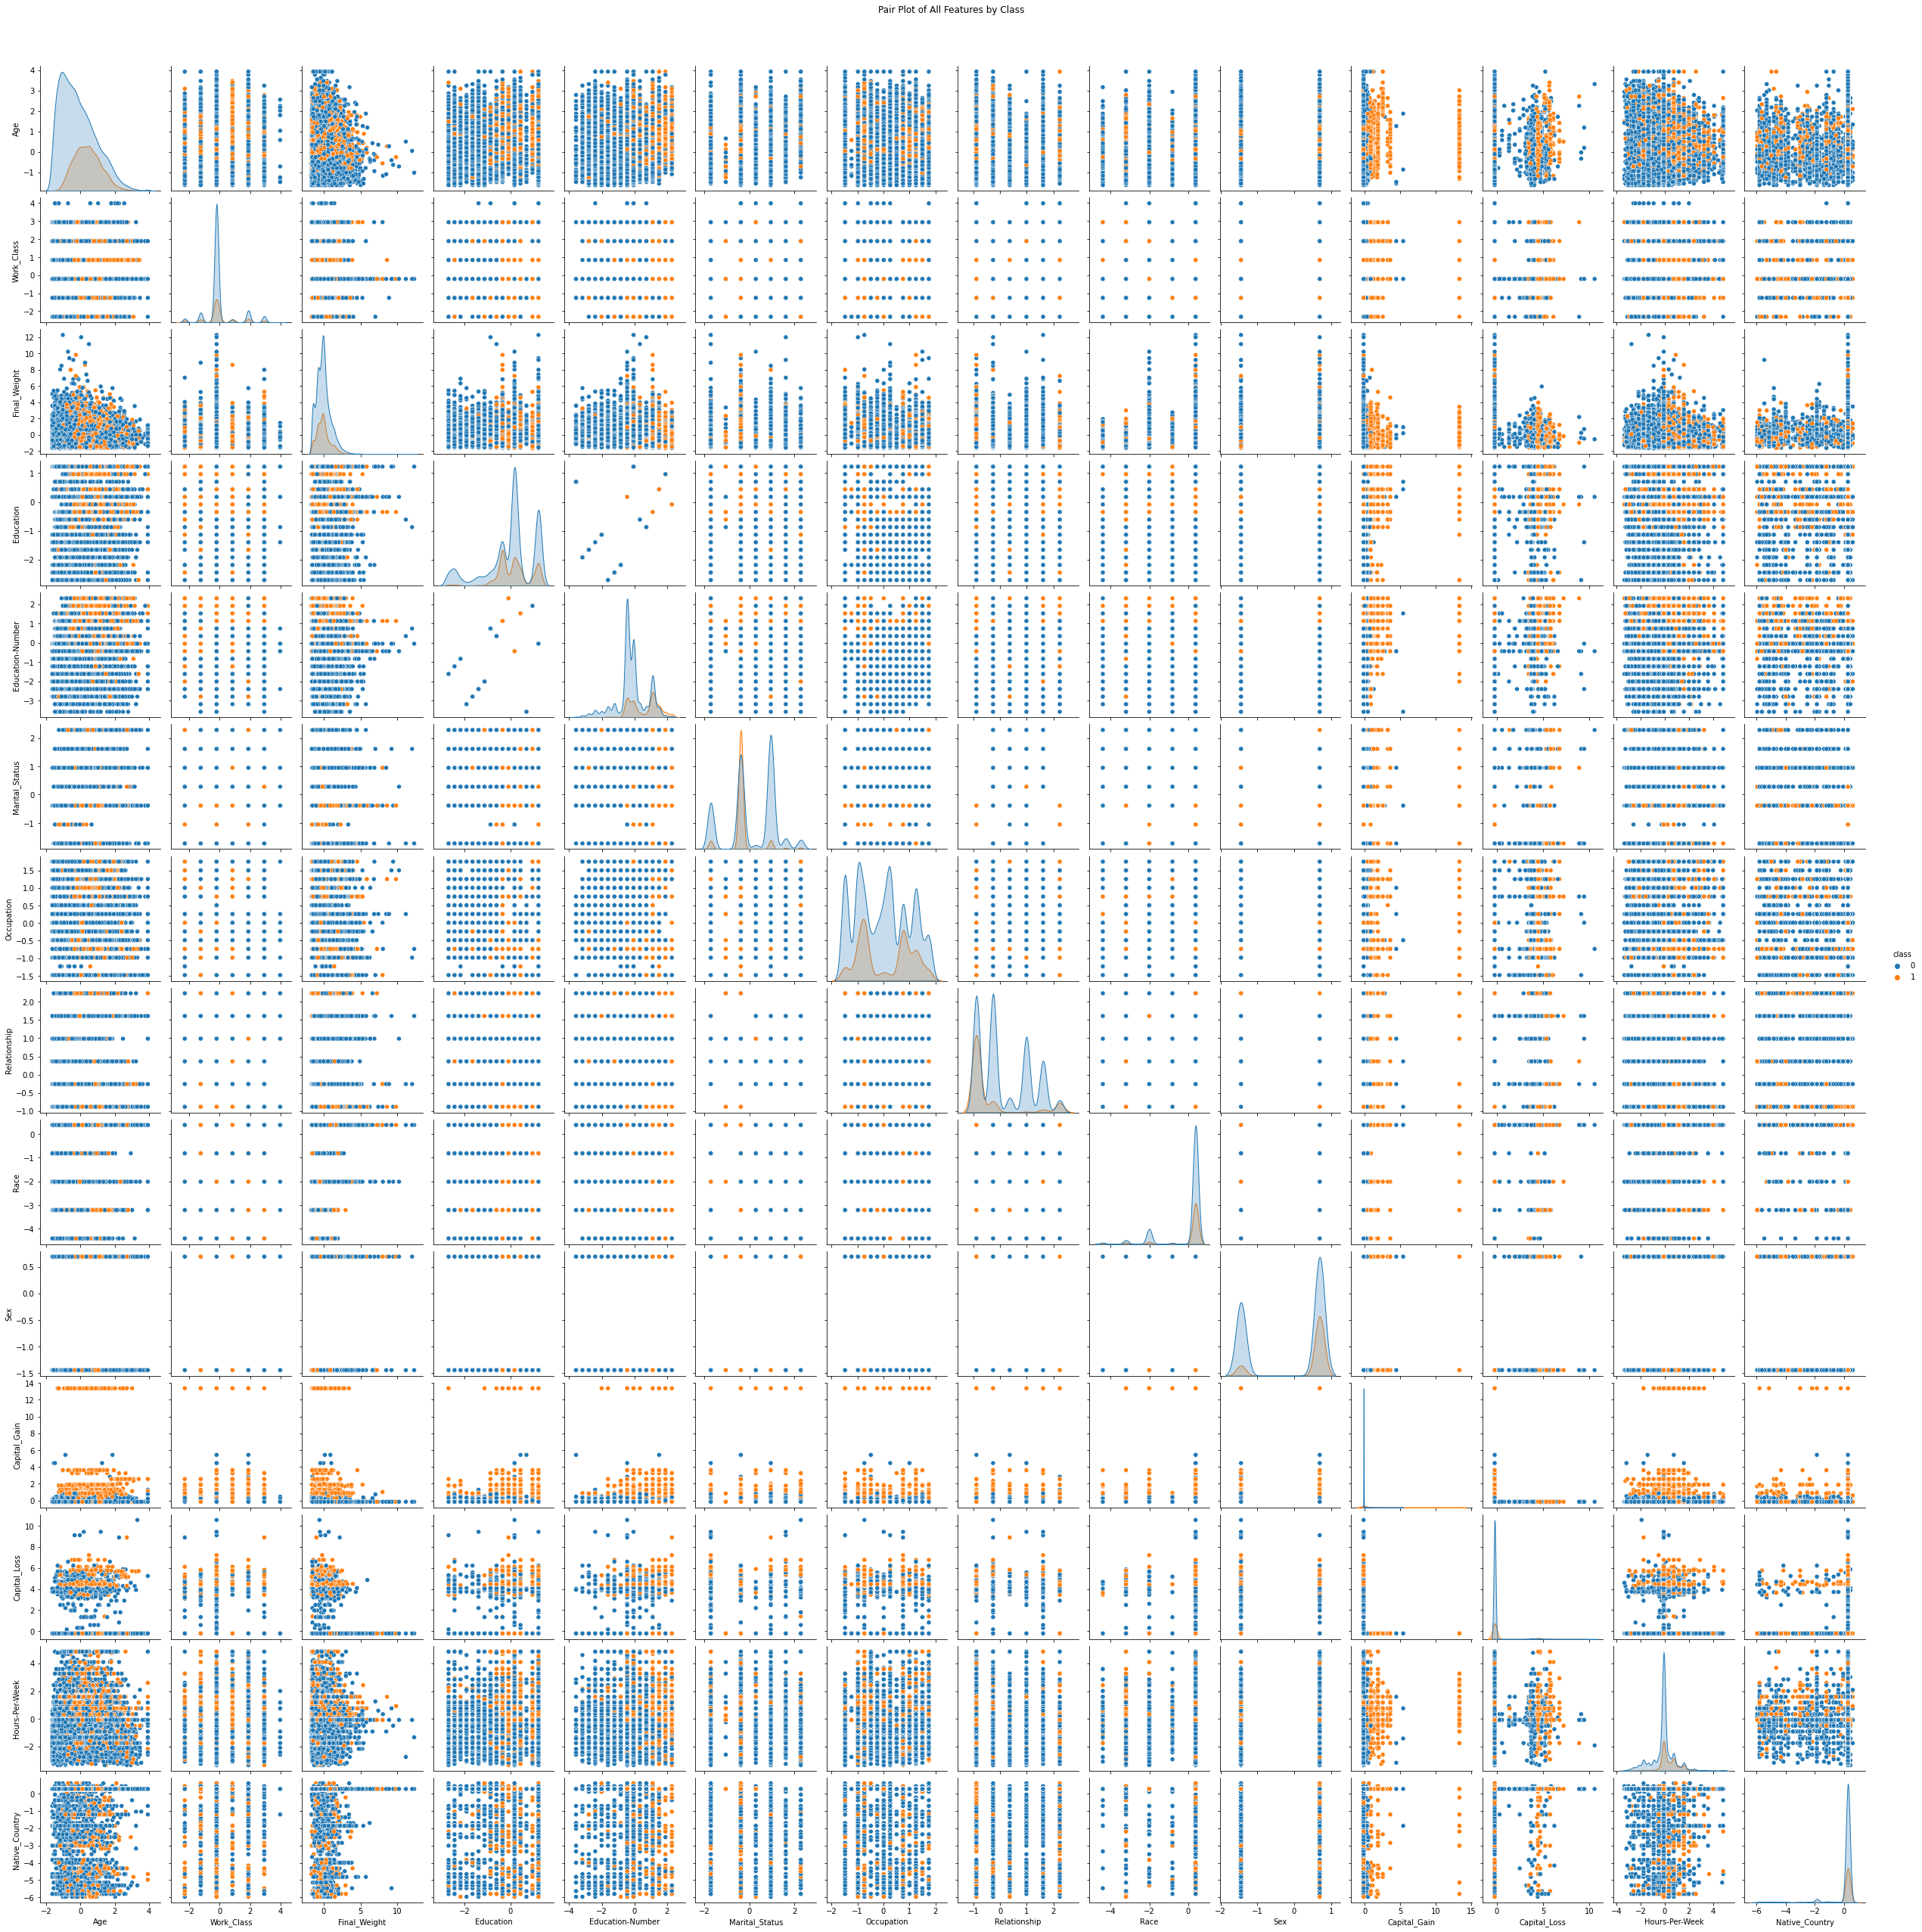

In [136]:
features = df.drop('Income', axis=1)

# Add a 'class' column back to color points by class
features['class'] = df['Income']

# Create a pair plot
sns.pairplot(features, hue='class', diag_kind='kde')
plt.suptitle('Pair Plot of All Features by Class', y=1.02)
plt.show()

برای قسمت Data Visualization از دو روش استفاده می¬کنیم. روش اول از پکیج ydata_profiling استفاده می¬کنیم که برای explore کردن دیتا بسیار مناسب است و برای قسمت ویژوالیزیشن نیز کتابخانه seaborn و تابع pairplot استفاده می¬کنیم که تمامی فیچر هارا دوبه¬دو با یکدیگر اسکترپلاتشان را رسم می¬کند.


---


<div dir="rtl">
<h2 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
آموزش مدل با روش های مختلف
</h2>
</div>
<div dir="rtl">
<div dir="rtl">
<p align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
دﺭ ﺁﻣﻮﺯﺵ ﻫﺮ ﻣﺪﻝ ، ﺩﺭ ﺻﻮﺭﺕ ﺗﻨﻈﻴﻢ ﻫﺎﻳﭙﺮﭘﺎﺭﺍﻣﺘﺮﻫﺎﻱ ﻣﺪﻝ ﺩﺭ ﻛﺘﺎﺑﺨﺎﻧﻪ sklearn، ﺩﻻﻳﻞ ﺍﻳﻦ ﺍﻧﺘﺨﺎﺏ ﻫﺎ ﻭ ﺗﺤﻠﻴﻞ
ﺧﻮﺩﺗﺎﻥ ﺭﺍ ﺍﺯ ﻧﺘﺎﻳﺢ ﺣﺎﺻﻞ ﺷﺪﻩ، ﮔﺰﺍﺭﺵ ﺩﻫﻴﺪ.</p>
</div>


<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:times new roman;color:white">
Support Vector Machine
</h3>
</div>
<div dir="rtl">
<p align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
در این قسمت مدل خود را با استفاده از Support Vector Machine آموزش دهید.
</p>
</div>

In [61]:
columns = df.columns.drop(['Income'])

x_train_SVM = df.loc[:, columns]
y_train_SVM = df.loc[:, 'Income']
x_train_SVM

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country
0,0.042796,2.936000,-1.062722,-0.349865,1.128918,0.947847,-1.479055,-0.261249,0.385048,0.692806,0.146092,-0.218586,-0.077734,0.264924
1,0.880288,1.887682,-1.007871,-0.349865,1.128918,-0.387275,-0.734545,-0.885737,0.385048,0.692806,-0.147445,-0.218586,-2.331531,0.264924
2,-0.033340,-0.208955,0.244693,0.174763,-0.439738,-1.722396,-0.238206,-0.261249,0.385048,0.692806,-0.147445,-0.218586,-0.077734,0.264924
3,1.108695,-0.208955,0.425240,-2.448375,-1.224066,-0.387275,-0.238206,-0.885737,-2.011035,0.692806,-0.147445,-0.218586,-0.077734,0.264924
4,-0.794697,-0.208955,1.406658,-0.349865,1.128918,-0.387275,0.754473,2.236703,-2.011035,-1.443405,-0.147445,-0.218586,-0.077734,-5.304034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,-0.870832,-0.208955,0.638972,-0.874492,0.736754,-0.387275,1.498983,2.236703,0.385048,-1.443405,-0.147445,-0.218586,-0.244682,0.264924
30158,0.118931,-0.208955,-0.335252,0.174763,-0.439738,-0.387275,0.009964,-0.885737,0.385048,0.692806,-0.147445,-0.218586,-0.077734,0.264924
30159,1.489374,-0.208955,-0.358575,0.174763,-0.439738,2.282969,-1.479055,1.612215,0.385048,-1.443405,-0.147445,-0.218586,-0.077734,0.264924
30160,-1.251511,-0.208955,0.110705,0.174763,-0.439738,0.947847,-1.479055,0.987727,0.385048,0.692806,-0.147445,-0.218586,-1.747213,0.264924


In [62]:
clf = SVC(kernel='rbf')
clf.fit(X=x_train_SVM, y=y_train_SVM)

SVC()

In [63]:
print('---- Train ----')
y_pred = clf.predict(x_train_SVM)
print(f"Precision: {precision_score(y_train_SVM, np.round(y_pred).astype(int), average='micro')}, Accuracy: {accuracy_score(y_train_SVM, np.round(y_pred).astype(int))}")

---- Train ----
Precision: 0.8525296730986008, Accuracy: 0.8525296730986008


در این قسمت ابتدا مدل را با استفاده از کتابخانه sklearn مدلسازی میکنیم و آموزش می¬دهیم سپس مقدار accuracy را با استفاده از metrics همان کتابخانه بدست می¬آوریم.

<div style="border-top: 1px dashed #999;"></div>

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:times new roman;color:white">
K-Nearest Neighbors</h3>
</div>
<div dir="rtl">
<p align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
در این قسمت مدل خود را با استفاده از KNeighborsClassifier آموزش دهید.
</p>
</div>

In [64]:
columns = df.columns.drop(['Income'])

x_train_KNN = df.loc[:, columns]
y_train_KNN = df.loc[:, 'Income']
x_train_KNN

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country
0,0.042796,2.936000,-1.062722,-0.349865,1.128918,0.947847,-1.479055,-0.261249,0.385048,0.692806,0.146092,-0.218586,-0.077734,0.264924
1,0.880288,1.887682,-1.007871,-0.349865,1.128918,-0.387275,-0.734545,-0.885737,0.385048,0.692806,-0.147445,-0.218586,-2.331531,0.264924
2,-0.033340,-0.208955,0.244693,0.174763,-0.439738,-1.722396,-0.238206,-0.261249,0.385048,0.692806,-0.147445,-0.218586,-0.077734,0.264924
3,1.108695,-0.208955,0.425240,-2.448375,-1.224066,-0.387275,-0.238206,-0.885737,-2.011035,0.692806,-0.147445,-0.218586,-0.077734,0.264924
4,-0.794697,-0.208955,1.406658,-0.349865,1.128918,-0.387275,0.754473,2.236703,-2.011035,-1.443405,-0.147445,-0.218586,-0.077734,-5.304034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,-0.870832,-0.208955,0.638972,-0.874492,0.736754,-0.387275,1.498983,2.236703,0.385048,-1.443405,-0.147445,-0.218586,-0.244682,0.264924
30158,0.118931,-0.208955,-0.335252,0.174763,-0.439738,-0.387275,0.009964,-0.885737,0.385048,0.692806,-0.147445,-0.218586,-0.077734,0.264924
30159,1.489374,-0.208955,-0.358575,0.174763,-0.439738,2.282969,-1.479055,1.612215,0.385048,-1.443405,-0.147445,-0.218586,-0.077734,0.264924
30160,-1.251511,-0.208955,0.110705,0.174763,-0.439738,0.947847,-1.479055,0.987727,0.385048,0.692806,-0.147445,-0.218586,-1.747213,0.264924


In [78]:
# Choose a range of K values
k_values = range(1, 21)

# Build and evaluate KNN models
for k in k_values:
    start_time = time.time()

    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X=x_train_KNN, y=y_train_KNN)
    y_pred = knn_model.predict(X=x_train_KNN)
    accuracy = accuracy_score(y_train_KNN, y_pred)

    elapsed_time = time.time() - start_time
    print(f'K={k}, Accuracy={accuracy}, elapsed_time={elapsed_time}')


K=1, Accuracy=0.9999668456998873, elapsed_time=4.790373086929321
K=2, Accuracy=0.8955639546449174, elapsed_time=8.948401689529419
K=3, Accuracy=0.8953981831443538, elapsed_time=9.019991636276245
K=4, Accuracy=0.8739805052715337, elapsed_time=9.682003498077393
K=5, Accuracy=0.8758371460778464, elapsed_time=10.12399959564209
K=6, Accuracy=0.8663218619454943, elapsed_time=10.623999118804932
K=7, Accuracy=0.8670181022478616, elapsed_time=10.851999521255493
K=8, Accuracy=0.860221470724753, elapsed_time=11.261999368667603
K=9, Accuracy=0.8612492540282475, elapsed_time=11.506003856658936
K=10, Accuracy=0.8573702009150587, elapsed_time=11.737018585205078
K=11, Accuracy=0.8576354353159604, elapsed_time=12.027978897094727
K=12, Accuracy=0.8540547709037862, elapsed_time=12.202999591827393
K=13, Accuracy=0.853723227902659, elapsed_time=12.397000551223755
K=14, Accuracy=0.8506067236920629, elapsed_time=12.557000398635864
K=15, Accuracy=0.8504077978913865, elapsed_time=12.894999742507935
K=16, Accur

In [79]:
knn_model = KNeighborsClassifier(n_neighbors=15)
knn_model.fit(X=x_train_KNN, y=y_train_KNN)
y_pred = knn_model.predict(X=x_train_KNN)
accuracy = accuracy_score(y_train_KNN, y_pred)
print(f'K={15}, Accuracy={accuracy}')

K=15, Accuracy=0.8504077978913865


در این قسمت اما چون مقدار K را به ما نداده ابتدا مدل را برای Kهای ۱ تا ۲۰ مدلسازی می¬کنیم و با توجه به دقت و تایم محاسبه مقدار k = 15 انتخاب می¬کنیم.

<div style="border-top: 1px dashed #999;"></div>

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:times new roman;color:white">
Naive Bayes
</h3>
</div>
<div dir="rtl">
<p align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
در این قسمت مدل خود را با استفاده از Naive Bayes آموزش دهید.
</p>
</div>

In [66]:
columns = df.columns.drop(['Income'])

x_train_Bayes = df.loc[:, columns]
y_train_Bayes = df.loc[:, 'Income']

In [67]:
naive_bayes_model = GaussianNB()

# Train the model on the training set
naive_bayes_model.fit(x_train_Bayes, y_train_Bayes)

# Make predictions on the testing set
y_pred = naive_bayes_model.predict(x_train_Bayes)

# Evaluate the performance
print('---- Train ----')
y_pred = naive_bayes_model.predict(x_train_Bayes)
print(f"Precision: {precision_score(y_train_Bayes, np.round(y_pred).astype(int), average='micro')}, Accuracy: {accuracy_score(y_train_Bayes, np.round(y_pred).astype(int))}")


---- Train ----
Precision: 0.7975929978118161, Accuracy: 0.7975929978118161


در این قسمت ابتدا مدل را با استفاده از کتابخانه sklearn مدلسازی میکنیم و آموزش می¬دهیم سپس مقدار accuracy را با استفاده از metrics همان کتابخانه بدست می¬آوریم.

<div style="border-top: 1px dashed #999;"></div>

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:times new roman;color:white">
Random Forest
</h3>
</div>
<div dir="rtl">
<p align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
در این قسمت مدل خود را با استفاده از RandomForestClassifier آموزش دهید.
</p>
</div>

In [68]:
columns = df.columns.drop(['Income'])

x_train_RandomForest = df.loc[:, columns]
y_train_RandomForest = df.loc[:, 'Income']

In [69]:
random_forest_model = RandomForestClassifier(criterion='entropy', max_depth=10, random_state=0)
random_forest_model.fit(x_train_RandomForest, y_train_RandomForest)

print('---- Train ----')
y_pred = random_forest_model.predict(x_train_RandomForest)
print(f"Precision: {precision_score(y_train_RandomForest, np.round(y_pred).astype(int), average='micro')}, Accuracy: {accuracy_score(y_train_RandomForest, np.round(y_pred).astype(int))}")


---- Train ----
Precision: 0.8623101916318546, Accuracy: 0.8623101916318546


در این قسمت ابتدا مدل را با استفاده از کتابخانه sklearn مدلسازی میکنیم و آموزش می¬دهیم سپس مقدار accuracy را با استفاده از metrics همان کتابخانه بدست می¬آوریم.


---


<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
مقایسه مدل ها</h3>
</div>

<div dir="rtl">
<p align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">

ﺩﺭ ﻧﻬﺎﻳﺖ ﺑﻌﺪ ﺍﺯ ﺁﻣﻮﺯﺵ ﻣﺪﻝ ﻫﺎ، ﺑﺮﺍﻱ ﺍﺭﺯﻳﺎﺑﻲ ﻋﻤﻠﻜﺮﺩ ﻣﺪﻝ ﻫﺎ، ﺍﺯ ﻣﺠﻤﻮﻋﻪ ﺩﺍﺩﻩ
<code> Adult_TestDataset </code>
ﺍﺳﺘﻔﺎﺩﻩ ﻧﻤﺎﻳﻴﺪ ﻭ ﺑﺎ ﺍﺳﺘﻔﺎﺩﻩ ﺍﺯ ﻣﺎﺗﺮﻳﺲ ﺩﺭﻫﻢ ﺭﻳﺨﺘﮕﻲ
<code> (confusion matrix) </code>
ﻭ ﻣﻌﻴﺎﺭﻫﺎﻱ ﺍﺭﺯﻳﺎﺑﻲ
<code> recall  </code>,
<code> precision  </code>,
<code> accuracy  </code>,
<code> f1-score    </code>
 ، ﺑﻪ ﺗﺤﻠﻴﻞ ﻧﺘﺎﻳﺞ ﺑﺪﺳﺖ ﺁﻣﺪﻩ ﺑﭙﺮﺩﺍﺯﻳﺪ. ﺗﻮﺟﻪ ﺩﺍﺷﺘﻪ ﺑﺎﺷﻴﺪ ﻛﻪ ﺑﺮﺍﻱ ﺳﺎﺩﮔﻲ ﻛﺎﺭ، ﻣﻲ ﺗﻮﺍﻧﻴﺪ ﺑﺎ ﺍﺳﺘﻔﺎﺩﻩ ﺍﺯ ﺗﻮﺍﺑﻊ ﺁﻣﺎﺩﻩsklearn  ، ﻣﺎﺗﺮﻳﺲ ﺩﺭﻫﻢ ﺭﻳﺨﺘﮕﻲ ﻭ ﻣﻌﻴﺎﺭﻫﺎﻱ ﺍﺭﺯﻳﺎﺑﻲ ﺭﺍ ﺑﺪﺳﺖ ﺁﻭﺭﻳﺪ.

</p>
</div>

In [71]:
df_test = pd.read_csv("Adult_TestDataset.csv").dropna()
df_test

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [72]:
encoder = LabelEncoder()
categorial_columns = list(df_test.select_dtypes(include='object').columns)

# For Descision Tree Part To Work I had To Encode The Population Level Too
for col in categorial_columns:
    df_test.loc[:, (col)] = encoder.fit_transform(df_test[col])
df_test

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,38,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,38,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,38,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,38,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,4,215419,9,13,0,10,1,4,0,0,0,36,38,0
16277,64,0,321403,11,9,6,0,2,2,1,0,0,40,38,0
16278,38,4,374983,9,13,2,10,0,4,1,0,0,50,38,0
16279,44,4,83891,9,13,0,1,3,1,1,5455,0,40,38,0


In [73]:
columns = df.columns.drop(['Income'])

x_test = df.loc[:, columns]
y_test = df.loc[:, 'Income']


Classification Report:

SVM:

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22654
           1       0.78      0.57      0.66      7508

    accuracy                           0.85     30162
   macro avg       0.82      0.76      0.78     30162
weighted avg       0.85      0.85      0.84     30162



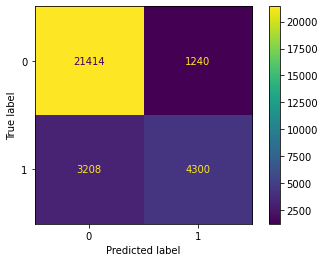

In [85]:
# Print classification report for more detailed metrics
print('\nClassification Report:')
print('\nSVM:\n')
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()



Classification Report:

KNN:

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     22654
           1       0.74      0.62      0.67      7508

    accuracy                           0.85     30162
   macro avg       0.81      0.77      0.79     30162
weighted avg       0.84      0.85      0.85     30162



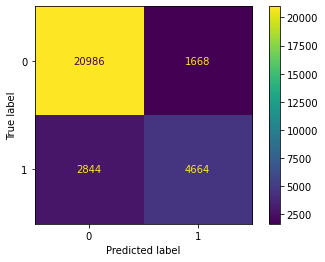

In [86]:
print('\nClassification Report:')
print('\nKNN:\n')
y_pred = knn_model.predict(x_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()


Classification Report:
\Baive Bayes:

              precision    recall  f1-score   support

           0       0.81      0.95      0.88     22654
           1       0.69      0.34      0.46      7508

    accuracy                           0.80     30162
   macro avg       0.75      0.65      0.67     30162
weighted avg       0.78      0.80      0.77     30162



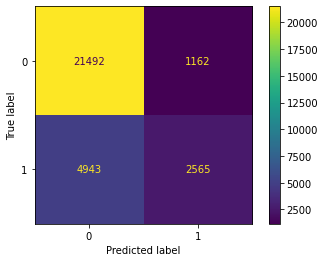

In [87]:
print('\nClassification Report:')
print('\Baive Bayes:\n')
y_pred = naive_bayes_model.predict(x_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()


Classification Report:

Random Forest:

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     22654
           1       0.83      0.57      0.67      7508

    accuracy                           0.86     30162
   macro avg       0.85      0.76      0.79     30162
weighted avg       0.86      0.86      0.85     30162



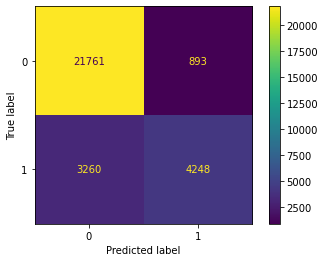

In [88]:
print('\nClassification Report:')
print('\nRandom Forest:\n')
y_pred = random_forest_model.predict(x_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

در این قسمت ابتدا مدل های آموزش داده شده را با داده های تست evaluate میکنیم. سپس با استفاده از classification-report دقت مدل هارا برسی می¬کنیم و در نهایت confusion matrix هر مدل را رسم می¬کنیم.

<p align=center style="font-size: 16;line-height:100%;font-family:vazir;color:#0099cc">
    تحیل شما
</p>


---


<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:green">
بخش امتیازی
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
هر روش دیگری برای آموزش مدل را میتوانید در این بخش پیاده سازی نمایید ، اما لازمه آن فهم کامل آن روش هست پس در صورتی که روش دیگری را نیز پیاده سازی کردید فهم خود را از نتایج بدست آمده و خود روش بنویسید.
</p>

</div>



In [102]:
columns = df.columns.drop(['Income'])

x_train = df.loc[:, columns]
y_train = df.loc[:, 'Income']

print(f"x_train_s shape:\n{x_train.shape}")
print(f"x_test_s shape:\n{x_test.shape}")
x_train

x_train_s shape:
(30162, 14)
x_test_s shape:
(30162, 14)


,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country
0,0.042796,2.936000,-1.062722,-0.349865,1.128918,0.947847,-1.479055,-0.261249,0.385048,0.692806,0.146092,-0.218586,-0.077734,0.264924
1,0.880288,1.887682,-1.007871,-0.349865,1.128918,-0.387275,-0.734545,-0.885737,0.385048,0.692806,-0.147445,-0.218586,-2.331531,0.264924
2,-0.033340,-0.208955,0.244693,0.174763,-0.439738,-1.722396,-0.238206,-0.261249,0.385048,0.692806,-0.147445,-0.218586,-0.077734,0.264924
3,1.108695,-0.208955,0.425240,-2.448375,-1.224066,-0.387275,-0.238206,-0.885737,-2.011035,0.692806,-0.147445,-0.218586,-0.077734,0.264924
4,-0.794697,-0.208955,1.406658,-0.349865,1.128918,-0.387275,0.754473,2.236703,-2.011035,-1.443405,-0.147445,-0.218586,-0.077734,-5.304034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,-0.870832,-0.208955,0.638972,-0.874492,0.736754,-0.387275,1.498983,2.236703,0.385048,-1.443405,-0.147445,-0.218586,-0.244682,0.264924
30158,0.118931,-0.208955,-0.335252,0.174763,-0.439738,-0.387275,0.009964,-0.885737,0.385048,0.692806,-0.147445,-0.218586,-0.077734,0.264924
30159,1.489374,-0.208955,-0.358575,0.174763,-0.439738,2.282969,-1.479055,1.612215,0.385048,-1.443405,-0.147445,-0.218586,-0.077734,0.264924
30160,-1.251511,-0.208955,0.110705,0.174763,-0.439738,0.947847,-1.479055,0.987727,0.385048,0.692806,-0.147445,-0.218586,-1.747213,0.264924


In [99]:
x_train.loc[0].shape

(14,)

In [109]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=x_train.loc[0].shape),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='softmax')
])

# Compile the model
model.compile(optimizer=keras.optimizers.SGD(lr=0.01),
              loss='categorical_crossentropy',
              metrics=['Accuracy', 'Precision'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
print("---- Test ----")
test_loss, test_accuracy, test_precision = model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Precision:', test_precision)
print('Test Accuracy:', test_accuracy)

print("---- Train ----")
train_loss, train_accuracy, train_precision = model.evaluate(x_train, y_train)
print('Train Loss:', train_loss)
print('Train Precision:', train_precision)
print('Train Accuracy:', train_accuracy)


Epoch 1/10


c:\Users\98912\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


943/943 [==============================] - 1s 1ms/step - loss: nan - Accuracy: 0.6969 - precision: 0.2472
Epoch 2/10
943/943 [==============================] - 1s 884us/step - loss: nan - Accuracy: 0.7511 - precision: 0.0000e+00
Epoch 3/10
943/943 [==============================] - 1s 873us/step - loss: nan - Accuracy: 0.7511 - precision: 0.0000e+00
Epoch 4/10
943/943 [==============================] - 1s 920us/step - loss: nan - Accuracy: 0.7511 - precision: 0.0000e+00
Epoch 5/10
943/943 [==============================] - 1s 887us/step - loss: nan - Accuracy: 0.7511 - precision: 0.0000e+00
Epoch 6/10
943/943 [==============================] - 1s 875us/step - loss: nan - Accuracy: 0.7511 - precision: 0.0000e+00
Epoch 7/10
943/943 [==============================] - 1s 877us/step - loss: nan - Accuracy: 0.7511 - precision: 0.0000e+00
Epoch 8/10
943/943 [==============================] - 1s 908us/step - loss: nan - Accuracy: 0.7511 - precision: 0.0000e+00
Epoch 9/10
943/943 [=============

<p align=center style="font-size: 16;line-height:100%;font-family:vazir;color:#0099cc">
    تحیل شما از مدل امتیازی
</p>